In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score,mean_absolute_error,root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('process/data_scaled.csv')
X = data.drop("Annual Turnover", axis=1)
y = data["Annual Turnover"]

In [28]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Calculamos algunas metricas

In [29]:
def gen_report_test(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Annual Turnover")
    plt.ylabel("Predicted Annual Turnover")
    plt.title(f"Predicted vs Actual (R2={r2_score(y_test, y_pred):.2f})")
    plt.grid()
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Annual Turnover")
    plt.ylabel("Predicted Annual Turnover")
    plt.title(f"Predicted vs Actual (R2={r2_score(y_test, y_pred):.2f})")
    plt.grid()
    plt.show()

    # Calculate residuals
    residuals = y_test - y_pred

    # Plotting Residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residuals vs. Predicted Values")
    plt.grid()
    plt.show()

    # Plotting a histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.grid()
    plt.show()

R2 Score: 0.2924
Mean Absolute Error: 0.1501
Root Mean Squared Error: 0.1897


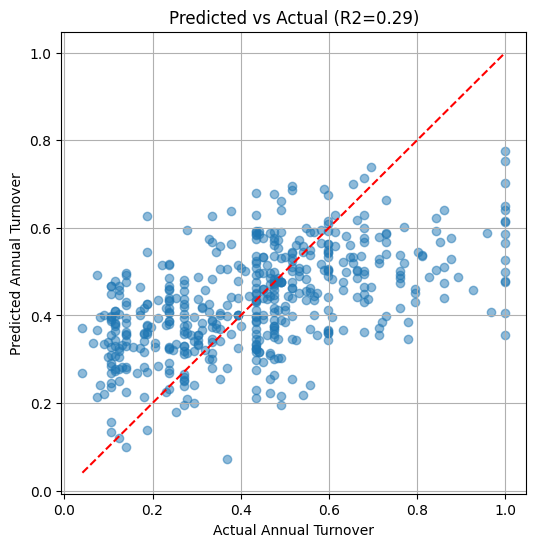

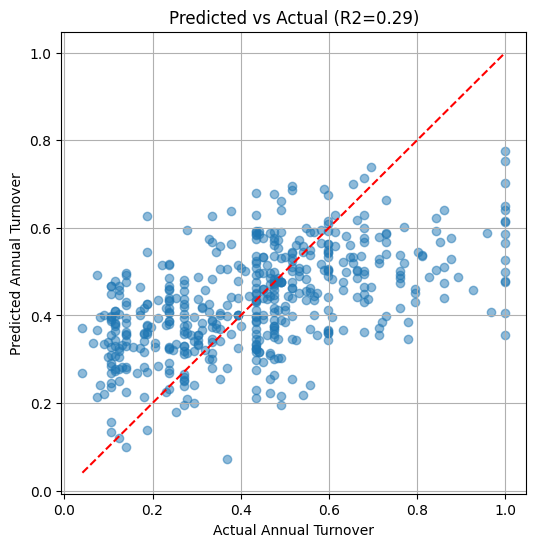

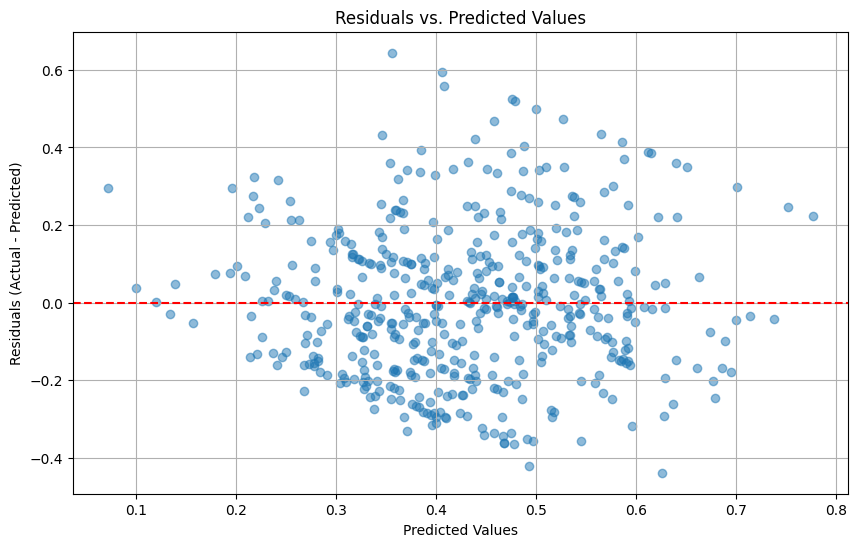

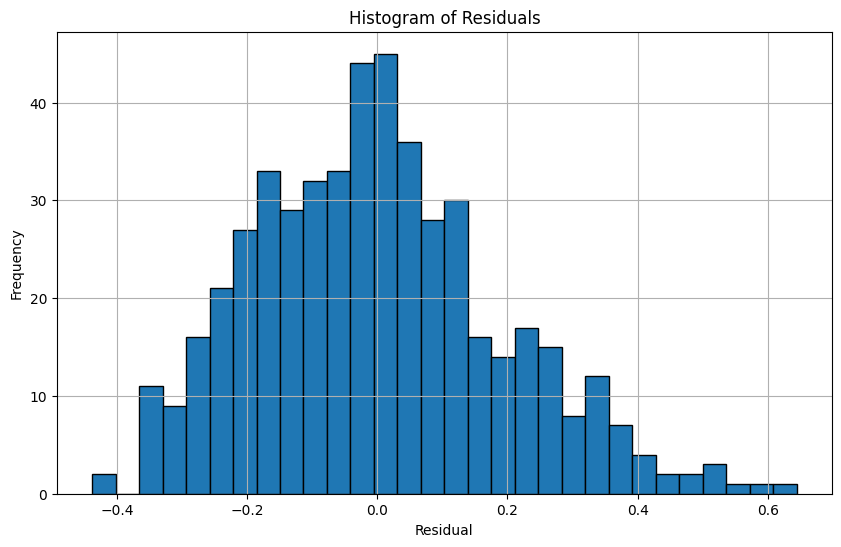

In [30]:
gen_report_test(y_test, y_pred)